#### Regression analysis (OLS)
This jupyter notebook shows how to perform ordinary least squares (OLS) regression on a [mpg](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset. Negative values and missing values were included to make the data more similar to real world keystroke data. Functions for data preparation and statistical testing are in user-defined submodules frequentist_statistics and frequentist_statistics_preparation. 

Several options are available within the regression ols function: to add an intercept, to normalize the predictors, to impute missing values, to print the resuls, to show diagnostic plots.

In [1]:
import os
tmp = os.getcwd()
os.chdir(tmp.split("data-science-core")[0] + "data-science-core")

In [2]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import statsmodels.api   as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import neuropy.frequentist_statistics as fs
import neuropy.utils as utils
# import frequentist_statistics_addition as fs_add
# import utils_addition as utils_add
from IPython.display import display

In [3]:
plt.style.use('seaborn') 
plt.rc('font'  , size      = 14)
plt.rc('figure', titlesize = 18)
plt.rc('axes'  , labelsize = 15)
plt.rc('axes'  , titlesize = 18)

### Data exploration
Missing values are added to the data to mimic real data.

In [4]:
# import data frame
data = sns.load_dataset(name = "mpg")
display(data.head())
data.dtypes

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [5]:
# Add missings to the data to mimic real data
data['displacement'] = utils.add_missings_or_negatives(data['displacement'], percentage=0.02, type='missings', random_seed=4)
data['cylinders'] = utils.add_missings_or_negatives(data['cylinders'], percentage=0.02, type='missings', random_seed=5)


In [6]:
utils.tiny_summary(data)

====== SUMMARY =====
- Number of columns = 9
- Number of samples = 398 

- Percentage % of missing values per feature
mpg             0.00
cylinders       2.01
displacement    2.01
horsepower      1.51
weight          0.00
acceleration    0.00
model_year      0.00
origin          0.00
name            0.00
dtype: float64

- Total number of missing values = 22

- Overall percentage of missing values = 0.006 %


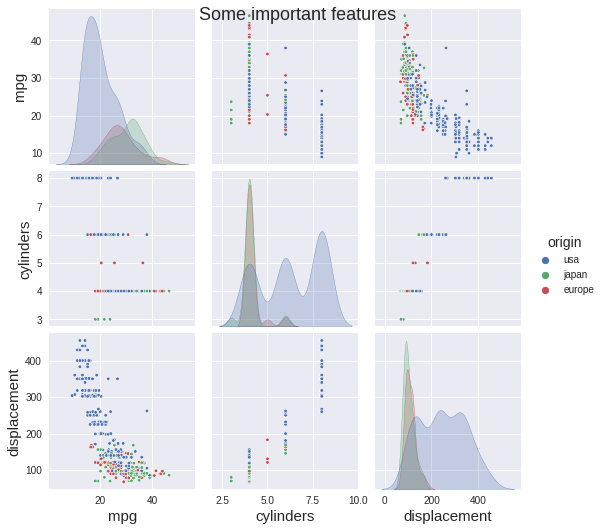

In [7]:
g = sns.pairplot(data, vars=['mpg','cylinders','displacement'], diag_kind='kde', hue='origin', markers='.', dropna=False)
_ = g.fig.suptitle('Some important features')

### Regression using ordinary least squares estimation
- consider `mpg` (miles per gallon) the target variable `y` (regression problem)
- consider only numerical features as predictor
- With regards to missing values, several options are available:
    - drop features with missing values  
    - drop observations with missing values  
    - impute missing values (e.g. using median value)

#### OLS regression with median imputation for missing values and normalized features
Miles per gallon is predicted using 5 features (i.e. cylinders, horsepower, displacement, weight, acceleration). An intercept is added to the model. Missing values are imputed with medians, all features are normalized (z-scores) beforehand. Results and model diagnostics (plots) are shown.

In [8]:
y = data['mpg'] 
X = data.drop(labels = ["mpg", "origin", "name", "model_year"], axis = 1)

In [9]:
# (df_coef, df_fitting) = fs_add.regression_ols(X, y, 
#                                      fit_intercept = True, 
#                                      normalize = False,
#                                      impute = True,
#                                      show = True, 
#                                      plot = True)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     188.9
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          5.04e-102
Time:                        15:41:28   Log-Likelihood:                -1138.5
No. Observations:                 398   AIC:                             2289.
Df Residuals:                     392   BIC:                             2313.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7183      0.400     -1.794   

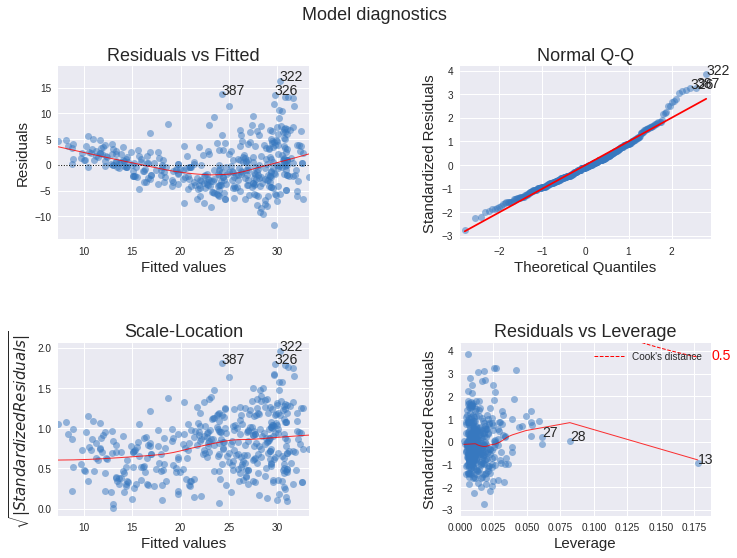

In [10]:
(df_coef, df_fitting, _) = fs.ols(X=X, y=y, 
                                     fit_intercept = True, 
                                     normalize = False,
                                     impute = True,
                                     show = True, 
                                     plot = True)

### Plot description

- **Residuals vs Fitted**: this graph shows if there are any nonlinear patterns in the residuals, and thus in the data as well. One of the mathematical assumptions in building an OLS model is that the data can be fit by a line. If this assumption holds and our data can be fit by a linear model, then we should see a relatively flat line when looking at the residuals vs fitted. An example of this failing would be trying to fit the function $f(x) = x^{2}$ with a linear regression $y = \alpha_{0} + \alpha_{1} x$. Clearly, the relationship is nonlinear and thus the residuals have non-random patterns. An **ideal** Residuals vs Fitted plot will look like **random noise**; there won’t be any apparent patterns in the scatterplot and the red line would be horizontal.
- **Normal Q-Q Plot:** this plot shows if the residuals are normally distributed. A good normal QQ plot has all of the residuals lying on or close to the red line. If the residual is not normally distributed it is more likely to observe extreme values than to be expected if the data was truly normally distributed. Note that, in general there is plenty of wiggle room in violating these assumptions, but it is good to know what assumptions about the data we are violating.
- **Scale-Location**: this plot is a way to check if the residuals suffer from non-constant variance, a.k.a. **heteroscedasticity**. The more horizontal the red line is, the more likely the data is **homoscedastic**. A typical heteroscedastic plot has a sideways V-shape and it is normally caused by not capturing the non-linearities in the model (see Residuals vs Fitted plot) and merits further investigation or model tweaking. The two most common methods of *fixing* heteroscedasticity is using a *weighted least squares approach*, or using a *heteroscedastic-corrected covariance matrix*.
- **Residuals vs Leverage**: leverage points have extreme $x$ values and they are different from outliers (which have an extreme $y$ valuea). Leverage points involve damaging effects on the model because the $\alpha$ coefficients are very sensitive to them and they can be easily detected via the **Cook’s Distance** (a leverage point helds a Cook’s Distance > 0.5). In practice, there may be cases where we may want to remove points with a Cook’s distance of less than 0.5, especially if there are only a few observations compared to the rest of the data.

In [11]:
# print coefficient info
display(df_coef.style.format({'p-value': "{:.3f}"}))
# print fitting info
display(df_fitting.style.format({'p-value': "{:.3f}"}))

,coef,std-err,[0.025,0.975],p-value,stat-sign
cylinders,-0.718328,0.400407,-1.505543,0.068886,0.074,False
displacement,0.007733,0.008950,-0.009864,0.025330,0.388,False
horsepower,-0.045061,0.016443,-0.077389,-0.012733,0.006,True
weight,-0.005521,0.000798,-0.007089,-0.003952,0.000,True
acceleration,-0.007077,0.123653,-0.250183,0.236029,0.954,False
intercept,47.141971,2.607671,42.015200,52.268742,0.000,True


,target,n-obs,rmse,f-value,df1,df2,p-value,R-squared,Adj. R-squared
0,mpg,398,4.227967,188.856161,5.000000,392.000000,0.000,0.706648,0.702907


#### OLS regression with median imputation for missing values and normalized features
Miles per gallon is predicted using 2 features (i.e. weight, acceleration). An intercept is added to the model. Normalization and imputation is not used. Results and model diagnostics (plots) are shown.

In [13]:
# (df_coef, df_fitting) = fs_add.regression_ols(X, y, 
#                                      fit_intercept = True, 
#                                      normalize = False,
#                                      impute = False,
#                                      show = True, 
#                                      plot = True)

<ipython-input-14-d968c074e5a3>:1: UserWarning: WARNING: X included missing values. These observations are dropped in both y and X
  (df_coef, df_fitting, _) = fs.ols(X=X, y=y,


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           7.01e-99
Time:                        15:42:30   Log-Likelihood:                -1068.1
No. Observations:                 376   AIC:                             2148.
Df Residuals:                     370   BIC:                             2172.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6049      0.410     -1.475   

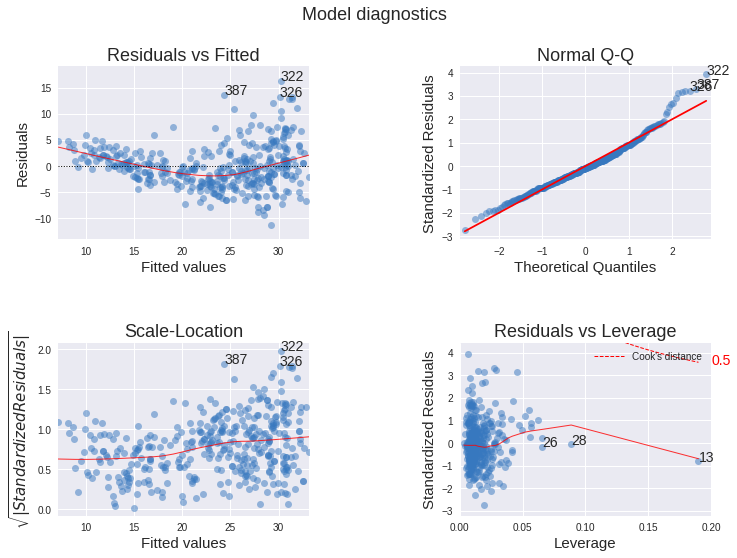

In [14]:
(df_coef, df_fitting, _) = fs.ols(X=X, y=y, 
                                     fit_intercept = True, 
                                     normalize = False,
                                     impute = False,
                                     show = True, 
                                     plot = True)

#### OLS regression with categorical predictors
In case non-numerical data types are present in X, dummy variables are created. The first category in the feature is dropped to prevent having a redundant feature. The name of the original feature and the names of the other categories are used to make new fetaures names and can be found in the coefficients table. Here, `origin` had three categories (i.e. 'Europe', 'USA', Japan') resulting in two dummy features: `origin_usa` and `origin_japan`.

In [ ]:
# X = data.drop(labels = ["mpg", "name", "model_year"], axis = 1)
# (df_coef, df_fitting) = fs_add.regression_ols(X, y, 
#                                      fit_intercept = True, 
#                                      normalize = False,
#                                      impute = False,
#                                      show = True, 
#                                      plot = True)

<ipython-input-15-32b649f58a9c>:2: UserWarning: WARNING: X included missing values. These observations are dropped in both y and X
  (df_coef, df_fitting, _) = fs.ols(X=X, y=y,
<ipython-input-15-32b649f58a9c>:2: UserWarning: WARNING: X included non-numerical features. Dummy variables will be created
  (df_coef, df_fitting, _) = fs.ols(X=X, y=y,


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     143.1
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          6.02e-101
Time:                        15:43:15   Log-Likelihood:                -1057.8
No. Observations:                 376   AIC:                             2132.
Df Residuals:                     368   BIC:                             2163.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7631      0.402     -1.900   

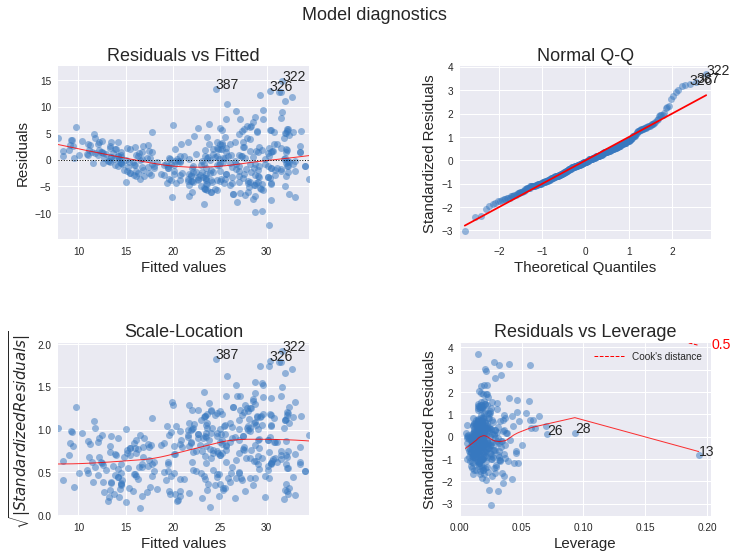

In [15]:
X = data.drop(labels = ["mpg", "name", "model_year"], axis = 1)
(df_coef, df_fitting, _) = fs.ols(X=X, y=y, 
                                     fit_intercept = True, 
                                     normalize = False,
                                     impute = False,
                                     show = True, 
                                     plot = True)